In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
import pandas as pd
import tensorflow as tf


In [2]:
# Import the csv
ed_df = pd.read_csv("GeorgiaData_UnionCounty/ga_data_overall_success.csv")

In [3]:
# find out the size of our data
print(ed_df.shape)

(120, 17)


In [4]:
# get a sample of the df
ed_df.head()

,Gender,Ethnicity,ELL,SWD,ED,SST,Gifted,Absences,Lexile,MATH 21 Scale Score,ELA 21 Scale Score,ELA 22 Pass,MATH 22 Pass,SCIE 22 Pass,SOCI 22 Pass,Subjects Passed,Overall Pass
0,FEMALE,"WHITE, NOT OF HISPANIC ORIGIN",N,N,Y,Y,N,2,1155,492,494,1,1,0,1,3,0
1,MALE,"WHITE, NOT OF HISPANIC ORIGIN",N,N,Y,N,N,40,885,494,443,0,1,1,1,3,0
2,FEMALE,"WHITE, NOT OF HISPANIC ORIGIN",N,N,Y,N,N,28,1205,486,507,1,1,1,1,4,1
3,MALE,"WHITE, NOT OF HISPANIC ORIGIN",N,Y,N,N,N,1,955,472,455,0,0,0,0,0,0
4,FEMALE,"WHITE, NOT OF HISPANIC ORIGIN",N,N,Y,N,N,10,1305,494,525,1,1,1,0,3,0


In [5]:
def gender_to_numeric(x):
    if x=='FEMALE': return 2
    if x=='MALE':   return 1

ed_df['gender_num'] = ed_df['Gender'].apply(gender_to_numeric)
ed_df.head()

,Gender,Ethnicity,ELL,SWD,ED,SST,Gifted,Absences,Lexile,MATH 21 Scale Score,ELA 21 Scale Score,ELA 22 Pass,MATH 22 Pass,SCIE 22 Pass,SOCI 22 Pass,Subjects Passed,Overall Pass,gender_num
0,FEMALE,"WHITE, NOT OF HISPANIC ORIGIN",N,N,Y,Y,N,2,1155,492,494,1,1,0,1,3,0,2
1,MALE,"WHITE, NOT OF HISPANIC ORIGIN",N,N,Y,N,N,40,885,494,443,0,1,1,1,3,0,1
2,FEMALE,"WHITE, NOT OF HISPANIC ORIGIN",N,N,Y,N,N,28,1205,486,507,1,1,1,1,4,1,2
3,MALE,"WHITE, NOT OF HISPANIC ORIGIN",N,Y,N,N,N,1,955,472,455,0,0,0,0,0,0,1
4,FEMALE,"WHITE, NOT OF HISPANIC ORIGIN",N,N,Y,N,N,10,1305,494,525,1,1,1,0,3,0,2


In [6]:
ethnicity_list = ed_df['Ethnicity'].value_counts()
print(ethnicity_list)

WHITE, NOT OF HISPANIC ORIGIN       107
HISPANIC                              9
Two Or More Races                     2
AMERICAN INDIAN OR ALASKA NATIVE      1
ASIAN                                 1
Name: Ethnicity, dtype: int64


In [7]:
def ethnicity_to_numeric(x):
    if x=='AMERICAN INDIAN OR ALASKA NATIVE': return 5
    if x=='ASIAN': return 4
    if x=='Two Or More Races': return 3
    if x=='HISPANIC': return 2
    if x=='WHITE, NOT OF HISPANIC ORIGIN':   return 1

ed_df['ethnicity_num'] = ed_df['Ethnicity'].apply(ethnicity_to_numeric)

In [8]:
def SWD_to_numeric(x):
    if x=='Y': return 2
    if x=='N':   return 1

ed_df['SWD_num'] = ed_df['SWD'].apply(SWD_to_numeric)

In [9]:
def ELL_to_numeric(x):
    if x=='Y': return 2
    if x=='N':   return 1

ed_df['ELL_num'] = ed_df['ELL'].apply(ELL_to_numeric)

In [10]:
def ED_to_numeric(x):
    if x=='Y': return 2
    if x=='N':   return 1

ed_df['ED_num'] = ed_df['ED'].apply(ED_to_numeric)

In [11]:
def Gifted_to_numeric(x):
    if x=='Y': return 2
    if x=='N':   return 1

ed_df['Gifted_num'] = ed_df['Gifted'].apply(Gifted_to_numeric)

In [12]:
def SST_to_numeric(x):
    if x=='Y': return 2
    if x=='N':   return 1

ed_df['SST_num'] = ed_df['SST'].apply(SST_to_numeric)

In [13]:
ed_num_df=ed_df.drop(['Gender','Ethnicity','SWD','ELL','ED','Gifted','SST','ELA 22 Pass','MATH 22 Pass','SCIE 22 Pass','SOCI 22 Pass','Subjects Passed'], axis=1)


In [14]:
# Define the sets
X = ed_num_df.copy()
X.drop("Overall Pass", axis=1, inplace=True)
X.head()

,Absences,Lexile,MATH 21 Scale Score,ELA 21 Scale Score,gender_num,ethnicity_num,SWD_num,ELL_num,ED_num,Gifted_num,SST_num
0,2,1155,492,494,2,1,1,1,2,1,2
1,40,885,494,443,1,1,1,1,2,1,1
2,28,1205,486,507,2,1,1,1,2,1,1
3,1,955,472,455,1,1,2,1,1,1,1
4,10,1305,494,525,2,1,1,1,2,1,1


In [15]:
# ethnicity_list = ed_num_df['ethnicity_num'].tolist()
# print(ethnicity_list)

In [16]:
y = ed_num_df["Overall Pass"].ravel()
y[:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
scaler = StandardScaler()

In [19]:
X_scaler = scaler.fit(X_train)

In [20]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [21]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)

In [22]:
rf_model = rf_model.fit(X_train_scaled, y_train)

In [23]:
predictions = rf_model.predict(X_test_scaled)

In [24]:
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Incomplete", "Full Pass"], columns=["Predicted 0", "Predicted 1"]
)

In [25]:
acc_score = accuracy_score(y_test, predictions)

In [26]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Incomplete,9,1
Full Pass,5,15


Accuracy Score : 0.8
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.90      0.75        10
           1       0.94      0.75      0.83        20

    accuracy                           0.80        30
   macro avg       0.79      0.82      0.79        30
weighted avg       0.84      0.80      0.81        30



In [27]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.28439279303463555, 'ELA 21 Scale Score'),
 (0.2832352153856845, 'Lexile'),
 (0.21355110444330155, 'MATH 21 Scale Score'),
 (0.0929991840383519, 'Absences'),
 (0.04601283956143001, 'SST_num'),
 (0.020139995819267426, 'Gifted_num'),
 (0.0179718483527238, 'gender_num'),
 (0.017420833523603994, 'SWD_num'),
 (0.015664830117569837, 'ED_num'),
 (0.004584003071072439, 'ethnicity_num'),
 (0.004027352652359078, 'ELL_num')]

<AxesSubplot:title={'center':'Student Demographics by importance'}, ylabel='1'>

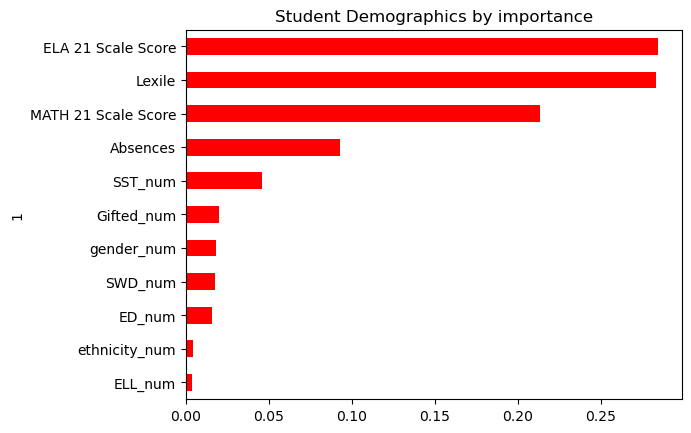

In [31]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='red', title= 'Student Demographics by Importance', legend=False)